In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


TYPE = "local"

if(TYPE == "cloud"):
    base_dir = './cloud/video/01'
elif(TYPE == "local"):
    base_dir = './local/video/01'
    
file_list = os.listdir(base_dir)


data = {}
data["Average RTT(ms)"] = []
data["Average Interaction Delay (ms)"] = []
data["Average Throughput (Mbps)"] = []
data["Schemes"] = []

NAME_MAPPING = {
    "MONAX": "Monax (Ours)",
    "VEGAS": "Vegas",
    "CUBIC": "Cubic",
    "PCC-ALLEGRO": "PCC Allegro",
    "PCC-VIVACE": "PCC Vivace",
    "BBR": "BBR"
}


points = {}

DATA_SCALE = 2


for file in file_list:
    if('csv' in file):
        print(file)
        CC = file.split('_')[0].upper()
        df = pd.read_csv(os.path.join(base_dir,file))
        if(TYPE == "cloud"):
            RTT_average = df['RTT_average'].values * DATA_SCALE
            end2end_average = df['end2end_average'].values* DATA_SCALE
        else:
            RTT_average = df['RTT_average'].values
            end2end_average = df['end2end_average'].values
            
        delivery_rate_average = df['delivery_rate_average'].values
        
        if(NAME_MAPPING[CC] not in points):
            points[NAME_MAPPING[CC]] = {}
            points[NAME_MAPPING[CC]]["delay"] = []
            points[NAME_MAPPING[CC]]["throughput"] = []
            
        points[NAME_MAPPING[CC]]["delay"].append(end2end_average)
        points[NAME_MAPPING[CC]]["throughput"].append(delivery_rate_average)
        
        data["Average RTT(ms)"]+=list(RTT_average)
        data["Average Interaction Delay (ms)"]+=list(end2end_average)
        data["Average Throughput (Mbps)"]+=list(delivery_rate_average)
        data["Schemes"]+=[NAME_MAPPING[CC] for i in range(len(end2end_average))]

        
MARKERS = {"Monax (Ours)":'*', "Vegas":'s', "Cubic":'o', "PCC Allegro":'X', "PCC Vivace":'^', "BBR":'P',
          "Indigo":'v', "Aurora":'d', "Remy":'D', "Orca":'>', "LEDBAT":'p'}



CCS = ["Monax (Ours)", "Cubic", "BBR", "Vegas","PCC Allegro",
       "PCC Vivace", "Indigo", "Aurora", "Remy", "LEDBAT"]


if(TYPE == "local"):
    points["Cubic"]["delay"] = 117
    points["Cubic"]["throughput"] = 11 

    points["Indigo"] = {}
    points["Indigo"]["delay"] = 81
    points["Indigo"]["throughput"] = 10.12

    points["Aurora"] = {}
    points["Aurora"]["delay"] = 96
    points["Aurora"]["throughput"] = 10.42

    points["Remy"] = {}
    points["Remy"]["delay"] = 98
    points["Remy"]["throughput"] = 10.21

    # points["Orca"] = {}
    # points["Orca"]["delay"] = 88
    # points["Orca"]["throughput"] = 10.75

    points["LEDBAT"] = {}
    points["LEDBAT"]["delay"] = 115
    points["LEDBAT"]["throughput"] = 10.8
else:
    
    points["Cubic"]["delay"] = 88
    points["Cubic"]["throughput"] = 10.98
    
    points["Monax (Ours)"]["delay"] = 59
    points["Monax (Ours)"]["throughput"] = 10.91
    
    points["PCC Allegro"]["delay"] = 84
    points["PCC Allegro"]["throughput"] = 10.84

    points["Indigo"] = {}
    points["Indigo"]["delay"] = 67
    points["Indigo"]["throughput"] = 10.86

    points["Aurora"] = {}
    points["Aurora"]["delay"] = 69
    points["Aurora"]["throughput"] = 10.85

    points["Remy"] = {}
    points["Remy"]["delay"] = 73
    points["Remy"]["throughput"] = 10.81

    # points["Orca"] = {}
    # points["Orca"]["delay"] = 64
    # points["Orca"]["throughput"] = 10.92

    points["LEDBAT"] = {}
    points["LEDBAT"]["delay"] = 66
    points["LEDBAT"]["throughput"] = 10.82
    



pcc-vivace_2021_12_06_17_42_10.csv
cubic_2021_12_06_16_33_35.csv
monax_2021_12_06_16_57_48.csv
bbr_2021_12_06_17_07_35.csv
pcc-allegro_2021_12_06_17_50_25.csv
vegas_2021_12_06_17_23_36.csv


In [146]:
# X_LIMIT = (70, 120)
# Y_LIMIT = (10, 11.5)

# X_LIMIT = (28, 55)
# Y_LIMIT = (10.85, 10.95)

# sns.set(font_scale=3)
# sns.set_style("whitegrid")
# # tips = {}
# # tips['Latency'] = [1,2,3,4,5,6,7,8,9,10]
# # tips['Throughput'] =ii [10,9,8,7,6,5,4,3,2,1]
# # tips['CC'] = ['BBR', 'CUBIC', 'Vivace', 'CUBIC','BBR', 'CUBIC', 'Allegro','BBR', 'CUBIC','BBR']
# # tips = pd.DataFrame(tips)


# g = sns.relplot(x="Average Interaction Delay (ms)", y="Average Throughput (Mbps)", hue='Schemes', style='Schemes', aspect=1, data=data, s=1000);
# for lh in g._legend.legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [300] 
    
# # g.set(xlim=X_LIMIT,ylim=Y_LIMIT)
# g.set_xticklabels(fontsize=22)
# g.set_yticklabels(fontsize=22)

# g.savefig("./01.png", dpi = 400)    




# plt.xlim(0)
# plt.ylim(38,46)

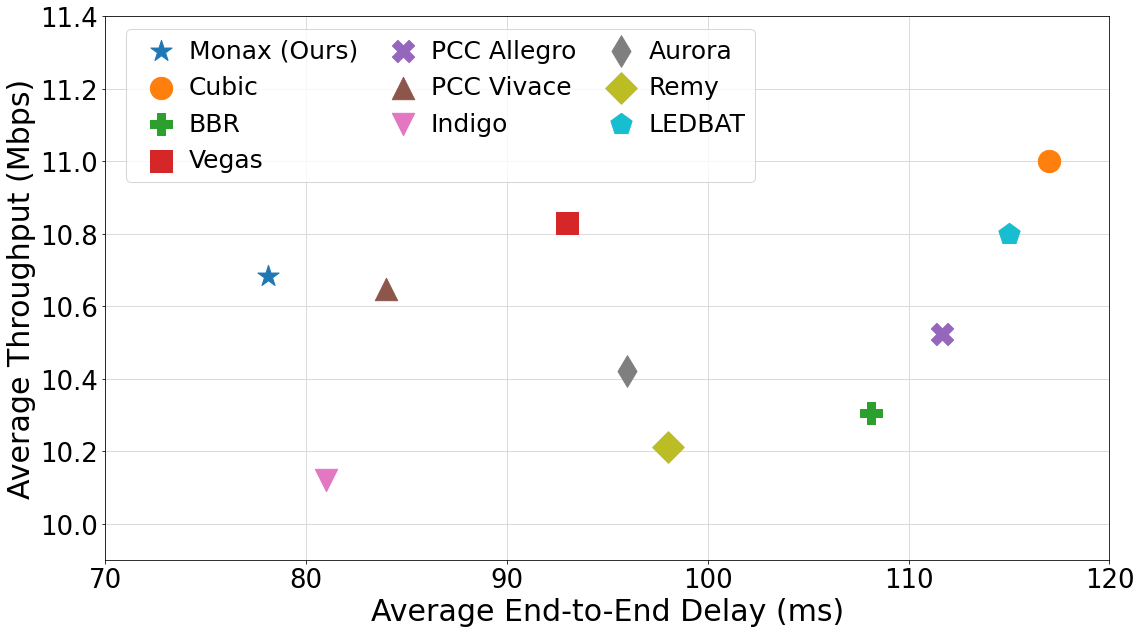

In [147]:

# plt.style.use('ggplot')
MARKER_SIZE = 500

fig, axes = plt.subplots(1, 1, figsize=(18,10))

x = list(range(1,17))

plt.grid(zorder=0, c='lightgrey')
count = 0
for CC in CCS:
    axes.scatter(points[CC]["delay"], points[CC]["throughput"], label=CC, marker=MARKERS[CC], s=MARKER_SIZE, zorder=100)
    count+=1


plt.legend(loc=1, fontsize=25, bbox_to_anchor = (0.66,1), title_fontsize=25, ncol=3, columnspacing=0.8, handletextpad=0.1)

# 画网格线

#设置坐标标签标注和字体大小
plt.xlabel("Average End-to-End Delay (ms)",fontsize=30)
plt.ylabel("Average Throughput (Mbps)",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

if(TYPE == "cloud"):
    # plt.xlim(26*DATA_SCALE,57*DATA_SCALE)
    plt.xlim(55,93)
    plt.ylim(10.78,11.02)
    plt.savefig("cloud_test.png", bbox_inches = 'tight')
elif(TYPE == "local"):
    plt.xlim(70,120)
    plt.ylim(9.9,11.4)
    plt.savefig("local_test.png", bbox_inches = 'tight')
    

plt.show()